**Inferencias / Predicciones**

In [4]:
import base64
import os
import os
import urllib
from IPython.display import Image
from zipfile import ZipFile
from azure.ai.ml.entities import AmlCompute
from azure.core.exceptions import ResourceNotFoundError

from azure.ai.ml.constants import AssetTypes, InputOutputModes
from azure.ai.ml import Input

from azure.ai.ml import MLClient
from azure.ai.ml import automl
from azure.identity import DefaultAzureCredential

from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes, InputOutputModes
from azure.ai.ml import Input

from PIL import Image
import jsonlines

import json
import mlflow
from mlflow.tracking.client import MlflowClient

def get_azure_credential(subscription_id, resource_group, workspace):
    credential = DefaultAzureCredential()
    ml_client = MLClient.from_config(credential)
    ml_client =  MLClient(credential, subscription_id, resource_group, workspace)
    return ml_client

ml_client = get_azure_credential("","","")

Found the config file in: /config.json


In [20]:
dataset_dir = "./data/lemon_dataset"

In [28]:


sample_image =os.path.join(dataset_dir,"good_quality","good_quality_0.jpg")

sample_image

'./data/lemon_dataset/good_quality/good_quality_0.jpg'

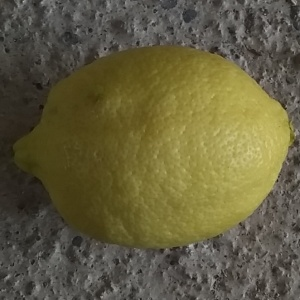

In [32]:
from IPython.display import Image

Image(filename=sample_image)

In [34]:

def read_image(image_path):
    with open(image_path, "rb") as f:
        return f.read()
        
request_json = {
    "input_data":{
        "columns":['image'],
        "data":[base64.encodebytes(read_image(sample_image)).decode("utf-8")]
    }
}
request_json

{'input_data': {'columns': ['image'],
  'data': ['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF\nBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK\nCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAEsASwDASIA\nAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA\nAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3\nODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm\np6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA\nAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx\nBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK\nU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3\nuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD4U1nQ\nrLXibi3lEwgVWmLtlQzAEj2PWsS08OX+keK4da8JQO9xEzOLfJIKqp3jjnaV3Z9q6L4eNp+leGJN\nTvb+2aS7hKyxBC

In [30]:
request_file_name = "sample_request_data.json"

with open(request_file_name, "w") as request_file:
    json.dump(request_json, request_file)

In [33]:
online_endpoint_name = "lemon-items11291500"
deployment_name = "id-mc-lemon-items-mlflow-depl"

resp = ml_client.online_endpoints.invoke(
    endpoint_name=online_endpoint_name,
    deployment_name=deployment_name,
    request_file=request_file_name
)


display(resp)

'[{"probs": [1.2812954082619399e-05, 5.994098728479003e-07, 0.9999865293502808], "labels": ["bad_quality", "empty_background", "good_quality"]}]'